In [1]:
import pandas as pd, numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('./datasets/titanic_train.csv')
test  = pd.read_csv('./datasets/titanic_test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data preparation

In [5]:
data = pd.concat([train, test])

In [6]:
to_drop = ['PassengerId', 'Ticket', 'Cabin', 'Name']
data.drop(to_drop, axis=1, inplace=True)

data.Sex, mapper_sex      = pd.factorize(data.Sex)
data.Embarked, mapper_emb = pd.factorize(data.Embarked)

data.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22,0,7.2500,0,3,0,1,0
1,38,1,71.2833,0,1,1,1,1
2,26,0,7.9250,0,3,1,0,1
3,35,0,53.1000,0,1,1,1,1
4,35,0,8.0500,0,3,0,0,0


In [7]:
train = data[~pd.isnull(data.Survived)].fillna(0.0)
test  = data.loc[pd.isnull(data.Survived)].fillna(0.0)

test.drop('Survived', axis=1, inplace=True)

In [8]:
from sklearn.ensemble import RandomForestClassifier

train_x = train.drop('Survived', axis=1)
train_y = train.Survived

rf = RandomForestClassifier(n_estimators=250)
rf.fit(train_x, train_y)

preds = rf.predict(test)

In [9]:
from treeinterpreter import treeinterpreter

In [10]:
pred, bias, contrib = treeinterpreter.predict(rf, test)
contrib = pd.DataFrame(contrib[:,:,1], columns=test.columns)

In [11]:
#test[test.Sex == 1]

In [12]:
test.iloc[14]

Age         47.000
Embarked     0.000
Fare        61.175
Parch        0.000
Pclass       1.000
Sex          1.000
SibSp        1.000
Name: 14, dtype: float64

In [13]:
print bias[14, 1]
print sum(contrib.iloc[14])
print pred[14, 1]

0.385144781145
0.578855218855
0.964


In [14]:
test.iloc[14]

Age         47.000
Embarked     0.000
Fare        61.175
Parch        0.000
Pclass       1.000
Sex          1.000
SibSp        1.000
Name: 14, dtype: float64

In [15]:
contrib.iloc[14]

Age        -0.005104
Embarked   -0.012474
Fare        0.115023
Parch       0.004854
Pclass      0.134774
Sex         0.321309
SibSp       0.020474
Name: 14, dtype: float64

In [16]:
c = contrib.iloc[14]

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import svgutils.transform as sg

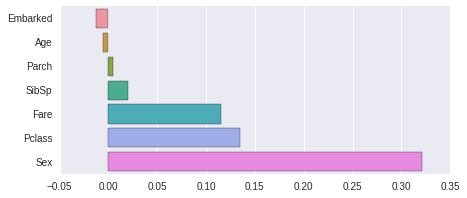

In [40]:
fig = plt.figure(figsize=(7, 3))

srtd = c.sort_values()
sns.barplot(srtd.values, srtd.index)

fig.savefig('../report/img/1-2-1.svg')

In [19]:
cumsum = np.array([sum(c.values[:i]) for i in range(c.shape[0] + 1)]) + bias[14, 1]
labels = ['Base'] + c.index.tolist()

In [20]:
cumsum

array([ 0.38514478,  0.38004126,  0.36756695,  0.48258975,  0.48744339,
        0.62221775,  0.94352633,  0.964     ])

In [35]:
freq = 100.0
xlbl = []
for l in labels:
    xlbl.append(l)
    xlbl.append("")

x = [i / 2 if i % 2 == 0 else i / 2 + 0.99 for i in range(len(xlbl))]

y = [cumsum[i / 2] for i in range(len(xlbl))]

In [36]:
xlbl, x, y

(['Base',
  '',
  'Age',
  '',
  'Embarked',
  '',
  'Fare',
  '',
  'Parch',
  '',
  'Pclass',
  '',
  'Sex',
  '',
  'SibSp',
  ''],
 [0, 0.99, 1, 1.99, 2, 2.99, 3, 3.99, 4, 4.99, 5, 5.99, 6, 6.99, 7, 7.99],
 [0.38514478114478157,
  0.38514478114478157,
  0.38004126386714498,
  0.38004126386714498,
  0.36756695073901463,
  0.36756695073901463,
  0.48258974622269429,
  0.48258974622269429,
  0.4874433869389721,
  0.4874433869389721,
  0.62221775002078106,
  0.62221775002078106,
  0.94352633041098144,
  0.94352633041098144,
  0.96400000000000052,
  0.96400000000000052])

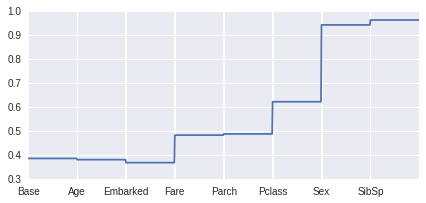

In [41]:
fig = plt.figure(figsize=(7, 3))

plt.xticks(x, xlbl)
plt.plot(x,y)
plt.show()

fig.savefig('../report/img/1-2-2.svg')